# Hands-on-data #2

The goal of this assignment is for you to practice simple visualizations applied to educational data. You can create those visualizations with Excel or any other software of your choice.

When submitting the assignment, submit a text document that includes your visualizations as well as explanations for your answers.

In [1]:
import pandas as pd
import ho2


## Question 1 (1.5 point)

Draw scatterplots and heatmap for the datasets named [Assignment-2-Scatterplot1.csv](./data/Assignment-2-Scatterplot-1.csv) and [Assignment-2-Scatterplot-2.csv](./data/Assignment-2-Scatterplot-2.csv). In both cases, give a quick description of the distribution of the data points and explain which visualization (scatterplot or heat map) is most appropriate.

In [2]:
scatter1 = pd.read_csv('./data/Assignment-2-Scatterplot-1.csv')
scatter2 = pd.read_csv('./data/Assignment-2-Scatterplot-2.csv')

(None, None)

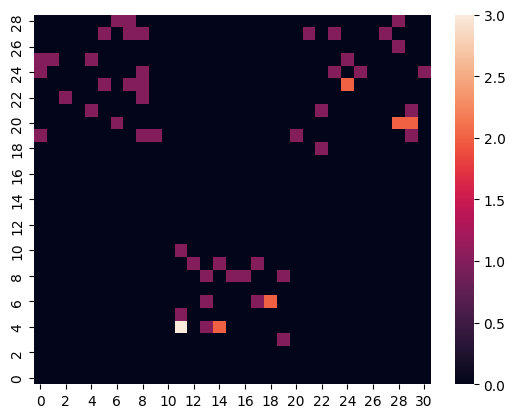

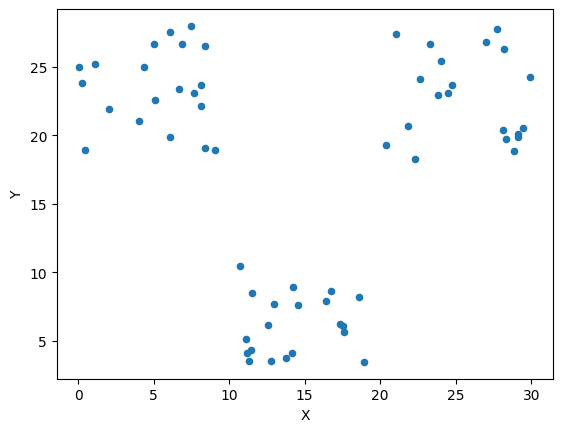

In [3]:
ho2.plot_heatmap(scatter1), ho2.plot_scatter(scatter1)

For `scatterplot-1`, we can see that points are clustered in 3 regions.
There isn't a lot of overlap for each data point, so a scatterplot is appropriate

(None, None)

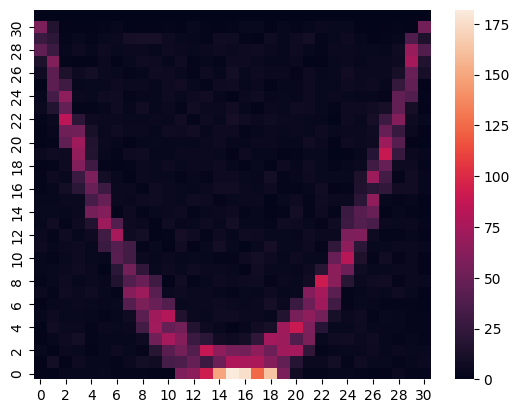

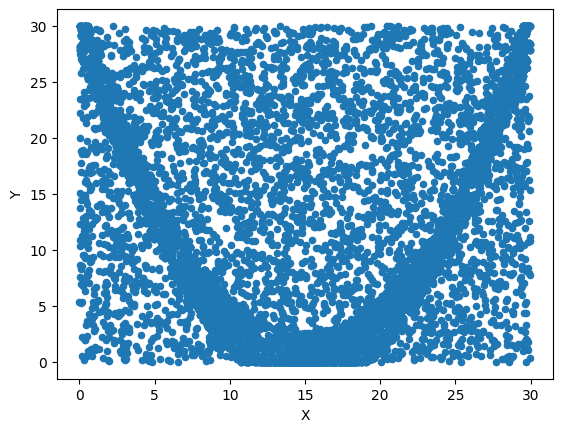

In [4]:
ho2.plot_heatmap(scatter2), ho2.plot_scatter(scatter2)

For `scatterplot-2`, many of the datapoints overlap.
The heatmap is the more appropriate visualization method, as in it we can better observe that the points are concentrated around the contour of a parabola.

## Question 2 (1.5 point)

Using the dataset named [ASSISTments-sample.csv](./data/ASSISTments-sample.csv), draw the learning curves for the skills named “Box and Whisker” and “Inverse Relation”. Provide a short description/analysis of each curve.

Skill: Box and Whisker
Beginning %: 0.5555555555555556
End %: 0.41666666666666663
   Change in %:0.13888888888888895

Skill: Inverse Relations
Beginning %: 0.6715116279069767
End %: 0.5333333333333333
   Change in %:0.1381782945736434



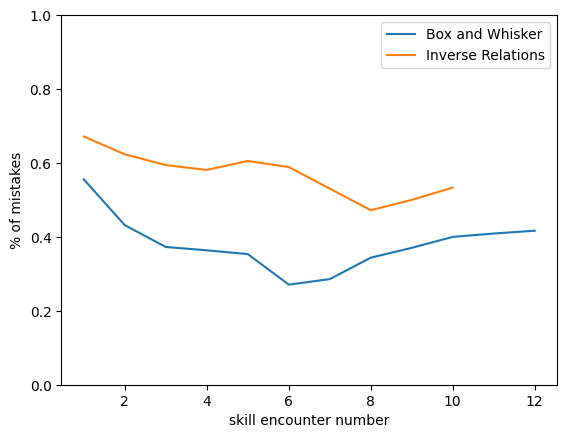

In [5]:
assistment = pd.read_csv('./data/ASSISTments-sample.csv')

ho2.learning_curve_for(assistment, 'Box and Whisker')
ho2.learning_curve_for(assistment, 'Inverse Relations')

Students make more mistakes in problems involving the skill `Inverse Relations`. The learning curve also indicates that student's progress is slower when compared to the skill `Box and Whisker`.
When solving  problems that involve the `Box and Whisker` skill, students are able to quickly improve. By the second time they encounter a `Box and Whisker` problem, students go from a $55\%$ mistake rate to under $45\%$ cummulative mistake rate ($45\%$ of all answered questions are incorrect).

Nevertheless, despite `Box and Whisker` having a faster improvement at the start, the two skills observe a very similar improvement of $13.8\%$.

## Question 3 (2 point)

Create a visualization using either the [ASSISTments](./data/ASSISTments-sample.csv) (this can include the features created during Weeks 2-3) or the [Cognitive Tutor](./data/CognitiveTutorAlgebra-gaming-clips.csv) (this can include the features created in Assignment 1) datasets. You are not limited to visualization types seen in class. Feel free to use other types of visualization (for example histograms or pie charts). Explain the goal behind the visualization (what information are you trying to convey) as well as a quick analysis of the result of applying this visualization to the dataset.

### Percent Incorrect for a Given Student

The function `plot_percent_incorrect` plots the percent of actions that resulted in either a `WRONG` or a `BUG` assessment for a given student.

As an example, any time student `z9svx3mA4s` tried to use the `squareroot` action, it resulted in an incorrect assessment.

A teacher could use this plot to see where their students are making the most mistakes. For student `z9svx3mA4s`, it could be that they need a refresher on squareroots.

In [6]:
cog_data = pd.read_csv('./data/CognitiveTutorAlgebra-gaming-clips.csv')

,student,action,Row ID,time,Gaming clip,Correct,Incorrect
0,AQfVkV1aEx,BLANK,197555.995407,18.476815,196508.756563,0.621610,0.378390
1,AQfVkV1aEx,add,197507.451613,31.354839,196149.000000,0.774194,0.225806
2,AQfVkV1aEx,aproot,197896.500000,36.500000,NaN,0.333333,0.666667
3,AQfVkV1aEx,clt,198072.714286,29.071429,NaN,0.285714,0.714286
4,AQfVkV1aEx,distribute,198707.428571,15.660714,NaN,0.892857,0.107143
...,...,...,...,...,...,...,...
867,z9svx3mA4s,simp,282338.250000,16.875000,NaN,0.875000,0.125000
868,z9svx3mA4s,split,281807.181818,9.000000,NaN,0.363636,0.636364
869,z9svx3mA4s,squareroot,280489.000000,3.000000,NaN,0.000000,1.000000
870,z9svx3mA4s,subtract,278728.905000,9.305000,278126.375000,0.905000,0.095000


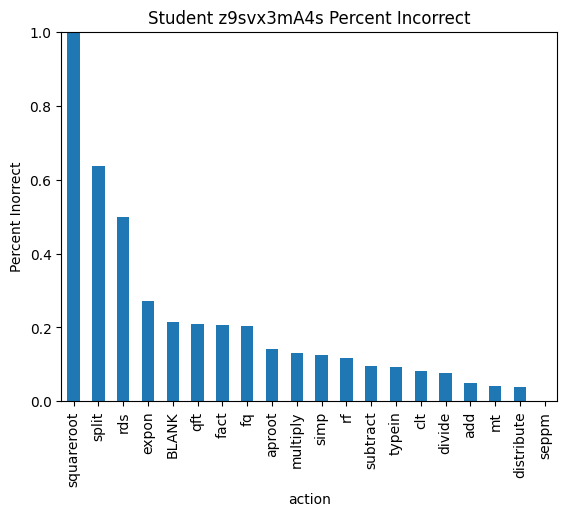

In [7]:
ho2.plot_percent_incorrect(cog_data, 'z9svx3mA4s')